In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("/content/Classified Data")

In [21]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
scaled_feature = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [28]:
df_feat=pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [29]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=df_feat
y=df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
krn = KNeighborsClassifier(n_neighbors=30)

In [47]:
krn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [48]:
prid=krn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(prid,y_test))
print(classification_report(prid,y_test))

[[164   7]
 [ 15 144]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       171
           1       0.95      0.91      0.93       159

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



In [43]:
error=[]
for i in range(1,40):
  krn = KNeighborsClassifier(n_neighbors=i)
  krn.fit(X_train,y_train)
  prid=krn.predict(X_test)
  error.append(np.mean(prid!=y_test))

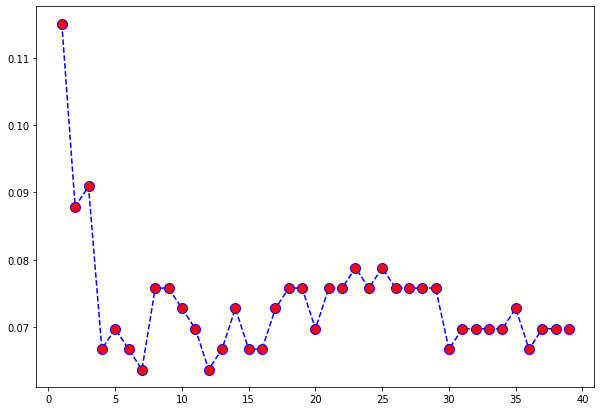

In [45]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
